In [1]:
import pandas as pd
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df_train = pd.read_csv('data/raw/raw.csv')

In [3]:
df_train.shape

(3000, 23)

In [4]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [5]:
df_train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [6]:
df_train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [7]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Discussion section on kaggle has information on some data that was missing/wrong:

In [8]:
df_train.loc[df_train['id'] == 16,'revenue'] = 192864          # Skinning
df_train.loc[df_train['id'] == 90,'budget'] = 30000000         # Sommersby          
df_train.loc[df_train['id'] == 118,'budget'] = 60000000        # Wild Hogs
df_train.loc[df_train['id'] == 149,'budget'] = 18000000        # Beethoven
df_train.loc[df_train['id'] == 313,'revenue'] = 12000000       # The Cookout 
df_train.loc[df_train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
df_train.loc[df_train['id'] == 464,'budget'] = 20000000        # Parenthood
df_train.loc[df_train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
df_train.loc[df_train['id'] == 513,'budget'] = 930000          # From Prada to Nada
df_train.loc[df_train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
df_train.loc[df_train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
df_train.loc[df_train['id'] == 850,'budget'] = 90000000        # Modern Times
df_train.loc[df_train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
df_train.loc[df_train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
df_train.loc[df_train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
df_train.loc[df_train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
df_train.loc[df_train['id'] == 1542,'budget'] = 1              # All at Once
df_train.loc[df_train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
df_train.loc[df_train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
df_train.loc[df_train['id'] == 1714,'budget'] = 46000000       # The Recruit
df_train.loc[df_train['id'] == 1721,'budget'] = 17500000       # Cocoon
df_train.loc[df_train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
df_train.loc[df_train['id'] == 1885,'budget'] = 12             # In the Cut
df_train.loc[df_train['id'] == 2091,'budget'] = 10             # Deadfall
df_train.loc[df_train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
df_train.loc[df_train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
df_train.loc[df_train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
df_train.loc[df_train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
df_train.loc[df_train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
df_train.loc[df_train['id'] == 2801,'budget'] = 10000000       # Fracture
df_train.loc[df_train['id'] == 335,'budget'] = 2 
df_train.loc[df_train['id'] == 348,'budget'] = 12
df_train.loc[df_train['id'] == 470,'budget'] = 13000000 
df_train.loc[df_train['id'] == 513,'budget'] = 1100000
df_train.loc[df_train['id'] == 640,'budget'] = 6 
df_train.loc[df_train['id'] == 696,'budget'] = 1
df_train.loc[df_train['id'] == 797,'budget'] = 8000000 
df_train.loc[df_train['id'] == 850,'budget'] = 1500000
df_train.loc[df_train['id'] == 1199,'budget'] = 5 
df_train.loc[df_train['id'] == 1282,'budget'] = 9               # Death at a Funeral
df_train.loc[df_train['id'] == 1347,'budget'] = 1
df_train.loc[df_train['id'] == 1755,'budget'] = 2
df_train.loc[df_train['id'] == 1801,'budget'] = 5
df_train.loc[df_train['id'] == 1918,'budget'] = 592 
df_train.loc[df_train['id'] == 2033,'budget'] = 4
df_train.loc[df_train['id'] == 2118,'budget'] = 344 
df_train.loc[df_train['id'] == 2252,'budget'] = 130
df_train.loc[df_train['id'] == 2256,'budget'] = 1 
df_train.loc[df_train['id'] == 2696,'budget'] = 10000000

In [9]:
df_train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [11]:
print(df_train['revenue'].isna().sum())
print(len(df_train[df_train['revenue'] == 0]))

0
0


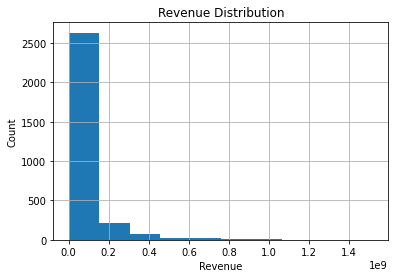

In [12]:
df_train['revenue'].hist()
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue Distribution')
plt.show()

This is deeply right-skewed. We will take a log value of revenue moving forward as we would like our target value to be normally distributed.

In [13]:
df_train['revenue'] = np.log(df_train['revenue'])

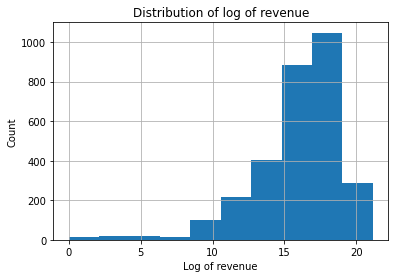

In [14]:
df_train['revenue'].hist()
plt.xlabel('Log of revenue')
plt.ylabel('Count')
plt.title('Distribution of log of revenue')
plt.show()

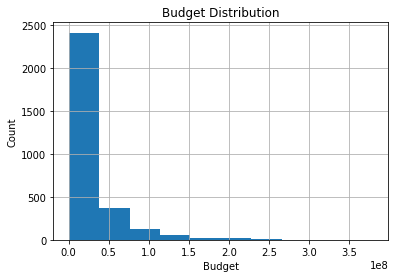

In [15]:
df_train['budget'].hist()
plt.xlabel('Budget')
plt.ylabel('Count')
plt.title('Budget Distribution')
plt.show()

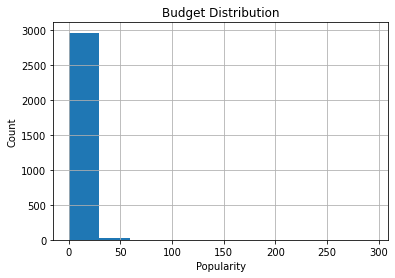

In [16]:
df_train['popularity'].hist()
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Budget Distribution')
plt.show()

The same is true for budget and popularity, they are both deeply skewed. At the moment we will leave them untransformed.

In [17]:
#df_train['budget'] = np.log(df_train['budget']+1)
#df_train['popularity'] = np.log(df_train['popularity']+1)

Text(0.5, 1.0, 'Budget vs. Revenue')

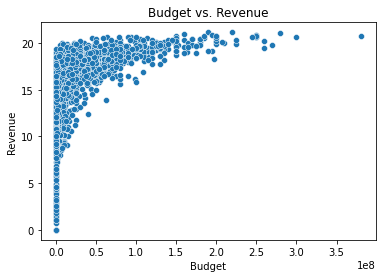

In [18]:

sns.scatterplot(x='budget',y='revenue',data=df_train)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')

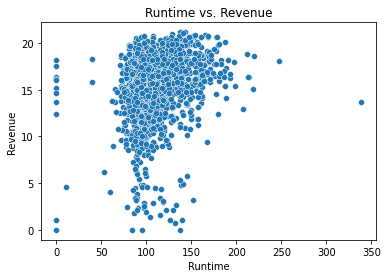

In [19]:

sns.scatterplot(x='runtime',y='revenue',data=df_train)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Runtime vs. Revenue')
plt.show()

In [20]:
print(df_train['runtime'].isnull().sum())
print(len(df_train[df_train['runtime'] == 0]))
print(df_train['runtime'].mean())

2
12
107.85657104736491


There are some missing values in runtime that we will later replace (during preprocessing).

Text(0.5, 1.0, 'Popularity vs. Revenue')

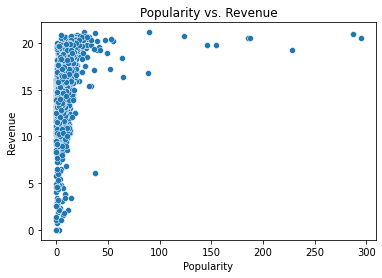

In [21]:

sns.scatterplot(x='popularity',y='revenue',data=df_train)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs. Revenue')

In [22]:
df_train.popularity.describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

In [23]:
df_train['release_date'] = df_train['release_date'].apply(pd.to_datetime)

In [24]:
print(df_train.release_date.describe(datetime_is_numeric=True))
#data was scraped in 2017, years beyond that are obvious mistakes
print(df_train[df_train['release_date'].dt.year > 2018].shape)

count                             3000
mean     2005-10-31 02:24:57.600000128
min                1972-01-13 00:00:00
25%                1996-02-22 12:00:00
50%                2006-03-26 00:00:00
75%                2012-10-18 12:00:00
max                2071-12-29 00:00:00
Name: release_date, dtype: object
(168, 23)


In [25]:
print(df_train[df_train['release_date'].dt.year > 2017].shape)

(168, 23)


In [26]:
df_train[df_train['release_date'].dt.year > 2017].head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
39,40,NaN,3800000,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,...,2065-04-07,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",9.607303
41,42,NaN,3000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,...,2067-06-22,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16.601618
51,52,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,...,2065-07-01,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",17.047632
61,62,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,...,2056-05-30,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",16.482739
68,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,...,2062-12-25,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,To Kill a Mockingbird,"[{'id': 577, 'name': 'black people'}, {'id': 8...","[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de...",16.390399


In [27]:
#100 year off mistake
df_train.loc[df_train['release_date'].dt.year > 2017,'release_date'] -= pd.DateOffset(years=100)


Text(0.5, 1.0, 'Revenue of Films over Time')

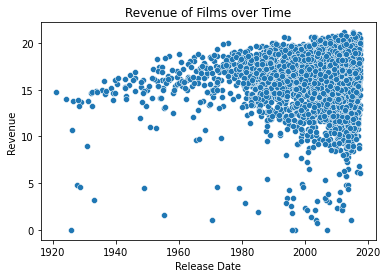

In [28]:
sns.scatterplot(x='release_date',y='revenue',data=df_train)
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.title('Revenue of Films over Time')



Text(0.5, 1.0, 'Release Year vs Average Revenue')

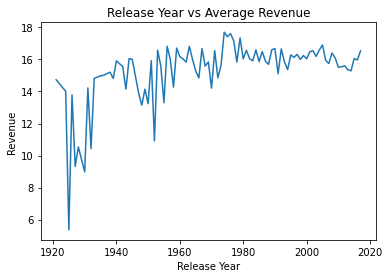

In [29]:
year = df_train['release_date'].dt.year
df_train.groupby(year)['revenue'].mean().plot()
plt.xlabel('Release Year')
plt.ylabel('Revenue');
plt.title("Release Year vs Average Revenue")

Examine Categorical Features:

First we will remove unnecessary features.

In [30]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [31]:
df_train.duplicated('id').sum()
df_train.drop(labels = ['id'],axis =1, inplace=True)

In [32]:
#drop imdb ids
df_train.imdb_id.duplicated().sum()
df_train.drop(labels='imdb_id',axis=1,inplace=True)


In [33]:
#create bool to track existence of homepages, then remove row with links
df_train['homepage_bool'] = df_train['homepage'].notna().astype('int')
df_train['homepage_bool'].sum()
df_train.drop(labels = ['homepage'],axis =1, inplace=True)


In [34]:

print(df_train['belongs_to_collection'].head())
print(df_train['belongs_to_collection'].isna().sum())

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object
2396


In [35]:
#create bool to track belonging to a collection
print(df_train['belongs_to_collection'].value_counts())
print(df_train['belongs_to_collection'].nunique())


df_train['belongs_to_collection_bool'] = df_train['belongs_to_collection'].notna().astype('int')
df_train.drop(labels = ['belongs_to_collection'],axis =1, inplace=True)

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                      16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]                7
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}]     6
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                  5
[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}]                       5
                                                                                                                                  

In [36]:
#original language
print(df_train['original_language'].isna().sum())
print(df_train['original_language'].value_counts())



0
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64


In [37]:
#drop original titles
print(df_train.original_title.value_counts())
print(df_train.original_title.nunique())
df_train.drop(labels=['original_title'],axis=1,inplace=True)

Joshua                        2
King Kong                     2
Bad Boys                      2
Black Sheep                   2
Red Dawn                      2
                             ..
To Die For                    1
A Love Song for Bobby Long    1
Dabba                         1
The Bone Collector            1
Abduction                     1
Name: original_title, Length: 2975, dtype: int64
2975


In [38]:
#drop overview
df_train.drop(labels=['overview'],axis=1,inplace=True)

In [39]:
#drop poster path
df_train.drop(labels=['poster_path'],axis=1,inplace=True)

In [40]:


def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [41]:
#production companies 
df_train['production_companies'].value_counts().head(25)

[{'name': 'Paramount Pictures', 'id': 4}]                                                               51
[{'name': 'Universal Pictures', 'id': 33}]                                                              36
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                     32
[{'name': 'Warner Bros.', 'id': 6194}]                                                                  32
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]                                         24
[{'name': 'Touchstone Pictures', 'id': 9195}]                                                           17
[{'name': 'New Line Cinema', 'id': 12}]                                                                 17
[{'name': 'Columbia Pictures', 'id': 5}]                                                                17
[{'name': 'TriStar Pictures', 'id': 559}]                                                               16
[{'name': 'Orion Pictures', 'id': 41}

In [42]:

df_train['prod_companies'] = pd.Series(dtype='object')
j = 0
for i in df_train['production_companies']:
    d = get_dictionary(i)
    if d != {}:
        df_train['prod_companies'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['prod_companies'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels='production_companies',axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
#number of production companies
df_train['prod_company_num'] = 0
prod_company_num = list()

for x in df_train[~df_train['prod_companies'].isna()]['prod_companies']:
    prod_company_num.append(len(x))
    
df_train.loc[~df_train['prod_companies'].isna(),'prod_company_num'] = prod_company_num

df_train['prod_company_num'].value_counts().head(10)


1    775
2    734
3    582
4    312
5    166
0    156
6    118
7     62
8     42
9     29
Name: prod_company_num, dtype: int64

In [44]:
#production countries
df_train['production_countries'].value_counts()
df_train['prod_country'] = pd.Series(dtype='object')
j = 0
for i in df_train['production_countries']:
    d = get_dictionary(i)
    if d != {}:
        df_train['prod_country'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['prod_country'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels=['production_countries'],axis=1,inplace=True)


In [45]:
#number of production countries
df_train['prod_country_num'] = 0
prod_country_num = list()

for x in df_train[~df_train['prod_country'].isna()]['prod_country']:
    prod_country_num.append(len(x))
    
df_train.loc[~df_train['prod_country'].isna(),'prod_country_num'] = prod_country_num

df_train['prod_country_num'].value_counts().head(10)


1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: prod_country_num, dtype: int64

In [46]:

df_train['prod_country'].explode().value_counts(1).cumsum().head(25)



United States of America    0.573511
United Kingdom              0.669012
France                      0.724805
Germany                     0.766776
Canada                      0.796934
India                       0.817291
Italy                       0.833375
Australia                   0.848706
Japan                       0.864036
Russia                      0.878613
Spain                       0.892184
Hong Kong                   0.902739
China                       0.913295
Ireland                     0.919075
Belgium                     0.924855
South Korea                 0.930385
Mexico                      0.935160
Sweden                      0.939683
New Zealand                 0.943956
Netherlands                 0.947726
Czech Republic              0.951244
Denmark                     0.954511
Brazil                      0.957527
Luxembourg                  0.960040
South Africa                0.962553
Name: prod_country, dtype: float64

The top 25 most common production countries amount for more than 95% of all films in our dataset, we will make dummy variables to track whether a film was made in one of them.

In [47]:
df_train.loc[df_train['prod_country'].isna(),'original_language'].value_counts()

en    48
ru     2
it     2
vi     1
tr     1
fi     1
Name: original_language, dtype: int64

In [48]:

def set_prod(lang):
    country = list()
    for l in lang:
        if l == 'en':
            country.append('United States of America')
        if l == 'ru':
            country.append('Russia')
        if l == 'it':
            country.append('Italy')
        if l == 'tr':
            country.append('Turkey')
        if l == 'fi':
            country.append('Finland')
        if l == 'vi':
            country.append('Vietnam')
    return country
df_train.loc[df_train['prod_country'].isna(),'prod_country'] = set_prod(df_train.loc[df_train['prod_country'].isna(),'original_language'])


In [49]:
pop_prod_country = df_train['prod_country'].explode().value_counts().head(25)
pop_prod_country.index

for country in pop_prod_country.index:
    df_train['prod_'+country] = 0

In [50]:
for i in range(len(df_train)):
    for country in pop_prod_country.index:
        country_ix = 'prod_'+country
        if country in df_train.loc[i,'prod_country']:
            df_train.loc[i,country_ix] = 1


In [51]:
df_train['prod_United States of America'].sum()

2330

Now do the same for the major production companies. There are more than 8000 companies, but we will only look at the top 50.

In [52]:
print(df_train['prod_companies'].explode().count())
print(df_train['prod_companies'].explode().value_counts())

8095
Warner Bros.                              202
Universal Pictures                        188
Paramount Pictures                        161
Twentieth Century Fox Film Corporation    138
Columbia Pictures                          91
                                         ... 
Videofilms                                  1
Riofilm                                     1
Zero Gravity Management                     1
Pierce/Williams Entertainment               1
Quick Six Entertainment                     1
Name: prod_companies, Length: 3695, dtype: int64


In [53]:
pop_prod_company = df_train['prod_companies'].explode().value_counts().head(50)
print(pop_prod_company.index)

for company in pop_prod_company.index:
    df_train['stud_'+company] = 0

df_train.columns


Index(['Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Columbia Pictures',
       'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures',
       'Walt Disney Pictures', 'Columbia Pictures Corporation',
       'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists',
       'Miramax Films', 'Village Roadshow Pictures', 'Regency Enterprises',
       'Dune Entertainment', 'BBC Films', 'Working Title Films',
       'Fox Searchlight Pictures', 'StudioCanal', 'Lionsgate',
       'DreamWorks SKG', 'Fox 2000 Pictures', 'Orion Pictures',
       'Hollywood Pictures', 'Summit Entertainment', 'Amblin Entertainment',
       'Dimension Films', 'Epsilon Motion Pictures',
       'Morgan Creek Productions', 'Focus Features', 'Original Film',
       'Castle Rock Entertainment', 'Participant Media', 'Legendary Pictures',
       'Blumhouse Productions', 'New Regency Pictures', 'Film4',
       'Spyglass Entertainment', '

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_company_num',
       'prod_country', 'prod_country_num', 'prod_United States of America',
       'prod_United Kingdom', 'prod_France', 'prod_Germany', 'prod_Canada',
       'prod_India', 'prod_Italy', 'prod_Australia', 'prod_Japan',
       'prod_Russia', 'prod_Spain', 'prod_Hong Kong', 'prod_China',
       'prod_Ireland', 'prod_Belgium', 'prod_South Korea', 'prod_Mexico',
       'prod_Sweden', 'prod_New Zealand', 'prod_Netherlands',
       'prod_Czech Republic', 'prod_Denmark', 'prod_Brazil',
       'prod_South Africa', 'prod_Luxembourg', 'stud_Warner Bros.',
       'stud_Universal Pictures', 'stud_Paramount Pictures',
       'stud_Twentieth Century Fox Film Corporation', 'stud_Columbia Pictures',
       'stud_Metro-Gold

In [54]:
df_train.prod_companies.fillna('None listed',inplace=True)

In [55]:
for i in range(len(df_train)):
    for company in pop_prod_company.index:
        company_ix = 'stud_'+company
        if company in df_train.loc[i,'prod_companies']:
            df_train.loc[i,company_ix] = 1


In [56]:
df_train['stud_Paramount Pictures'].sum()

161

In [57]:
df_train.head()

,budget,genres,original_language,popularity,release_date,runtime,spoken_languages,status,tagline,title,...,stud_Spyglass Entertainment,stud_Imagine Entertainment,stud_TSG Entertainment,stud_Millennium Films,stud_Screen Gems,stud_Silver Pictures,stud_France 2 Cinéma,stud_Lakeshore Entertainment,stud_Scott Rudin Productions,stud_The Weinstein Company
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,0,0,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,0,0,0,0,0,0,0,0,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,...,0,0,0,0,0,0,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,...,0,0,0,0,0,0,0,0,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_train.shape

(3000, 95)

In [59]:
#spoken languages 
#df_train['spoken_languages'] = pd.DataFrame()
df_train['lang_num'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['spoken_languages']:
    d = get_dictionary(i)
    if d != {}:
        df_train['lang_num'].iloc[j] = len(d)
    else:
        df_train['lang_num'].iloc[j] = np.NaN
    j += 1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
df_train['all_languages'] = pd.Series(dtype='object')
j = 0
for i in df_train['spoken_languages']:
    d = get_dictionary(i)
    if d != {}:
        df_train['all_languages'].iloc[j] = [d[x]['iso_639_1'] for x in range(0,len(d))]

    else:
         df_train['all_languages'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels=['spoken_languages'],axis=1,inplace=True)


In [61]:
df_train['all_languages'].explode().value_counts(1).cumsum().head(25)


en    0.600872
fr    0.666973
es    0.721827
de    0.760615
ru    0.795501
it    0.823961
ja    0.844388
zh    0.859995
hi    0.872848
pt    0.882717
ar    0.891898
ko    0.900390
cn    0.908653
ta    0.914850
pl    0.920588
hu    0.926096
la    0.931375
sv    0.936424
th    0.941473
cs    0.946064
he    0.949507
el    0.952949
tr    0.955933
da    0.958917
nl    0.961212
Name: all_languages, dtype: float64

The top 25 languages account for more than 95% of all languages. We will track whether a film runs in one of these top languages and whether its original language is one of these top languages.

In [62]:
df_train.loc[df_train['all_languages'].isna(),'all_languages'] = df_train.loc[df_train['all_languages'].isna(),'original_language']

In [63]:
top_lang = df_train['all_languages'].explode().value_counts().head(25)
print(top_lang.index)

for lang in top_lang.index:
    df_train['spoken_'+lang] = 0

df_train.columns


Index(['en', 'fr', 'es', 'de', 'ru', 'it', 'ja', 'zh', 'hi', 'pt', 'ar', 'ko',
       'cn', 'ta', 'pl', 'hu', 'la', 'sv', 'th', 'cs', 'he', 'el', 'tr', 'da',
       'nl'],
      dtype='object')


Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'status', 'tagline', 'title', 'Keywords',
       ...
       'spoken_hu', 'spoken_la', 'spoken_sv', 'spoken_th', 'spoken_cs',
       'spoken_he', 'spoken_el', 'spoken_tr', 'spoken_da', 'spoken_nl'],
      dtype='object', length=121)

In [64]:
for i in range(len(df_train)):
    for lang in top_lang.index:
        lang_ix = 'spoken_'+lang
        if lang in df_train.loc[i,'all_languages']:
            df_train.loc[i,lang_ix] = 1

In [65]:
df_train.loc[1]

budget                                                        40000000
genres               [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
original_language                                                   en
popularity                                                    8.248895
release_date                                       2004-08-06 00:00:00
                                           ...                        
spoken_he                                                            0
spoken_el                                                            0
spoken_tr                                                            0
spoken_da                                                            0
spoken_nl                                                            0
Name: 1, Length: 121, dtype: object

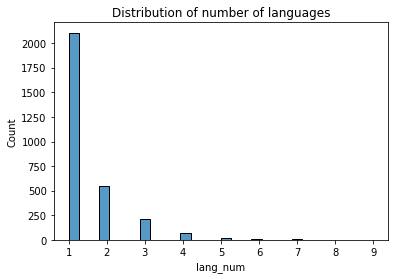

In [66]:
sns.histplot(x='lang_num',data=df_train,bins=30)
plt.title('Distribution of number of languages')
plt.show()

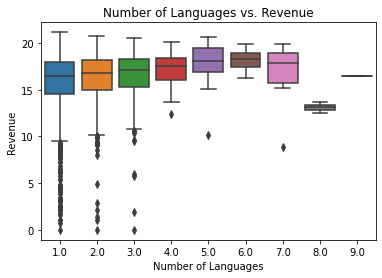

In [67]:

sns.boxplot(x='lang_num',y='revenue',data=df_train)
plt.xlabel('Number of Languages')
plt.ylabel('Revenue')
plt.title('Number of Languages vs. Revenue')
plt.show()

In [68]:
#status 
print(df_train['status'].value_counts())
df_train['released'] = (df_train['status'] == 'Released').astype(int)
df_train = df_train.drop(labels='status',axis=1)

Released    2996
Rumored        4
Name: status, dtype: int64


In [69]:
#tagline
print(df_train['tagline'].isna().sum())
#create bool for tracking existence of tagline 
df_train['has_tagline'] = df_train['tagline'].notna().astype('int')

df_train.drop(labels=['tagline'],axis=1,inplace=True)


597


In [70]:
#drop title
df_train['title']
df_train.drop(labels=['title'],axis=1,inplace=True)

In [71]:
#cast_size


df_train['cast_size'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['cast']:
    d = get_dictionary(i)
    if d != {}:
        df_train['cast_size'].iloc[j] = len(d)
    else:
        df_train['cast_size'].iloc[j] = np.NaN
    j += 1
df_train['cast_size']
#df_train['cast'].apply(lambda x: len(x) if x!= {} else 0).value_counts()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       24.0
1       20.0
2       51.0
3        7.0
4        4.0
        ... 
2995    15.0
2996    11.0
2997    15.0
2998    26.0
2999    34.0
Name: cast_size, Length: 3000, dtype: float64

In [72]:
df_train['cast_size'].fillna(0,inplace=True)

In [73]:
df_train.cast_size.value_counts().head(10)

15.0    212
16.0    165
10.0    135
13.0    129
12.0    124
11.0    122
17.0    118
9.0     118
18.0    115
14.0    110
Name: cast_size, dtype: int64

In [74]:
df_train['cast'].fillna({},inplace=True)

In [75]:
df_train['cast_genders'] = pd.Series(dtype='object')
j = 0
for i in df_train['cast']:
    d = get_dictionary(i)
    if d != {}:
        df_train['cast_genders'].iloc[j] = [d[x]['gender'] for x in range(0,len(d))]

    else:
         df_train['cast_genders'].iloc[j] = []
    j += 1



In [76]:

ix = 0
for row in df_train['cast_genders']:
    df_train.loc[ix,'cast_gen_0'] = row.count(0)
    df_train.loc[ix,'cast_gen_1'] = row.count(1)
    df_train.loc[ix,'cast_gen_2'] = row.count(2)
    ix +=1


In [77]:
df_train = df_train.drop(labels='cast_genders',axis=1)

In [78]:
df_train['actors'] = pd.Series(dtype='object')
j = 0
for i in df_train['cast']:
    d = get_dictionary(i)
    if d != {}:
        df_train['actors'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['actors'].iloc[j] = []
    j += 1

#df_train.drop(labels=['spoken_languages'],axis=1,inplace=True)


In [79]:
#Track the 25 most common actors as well

df_train['actors'].explode().value_counts().head(25)

Robert De Niro        30
Samuel L. Jackson     30
Morgan Freeman        27
Bruce Willis          25
J.K. Simmons          25
Liam Neeson           25
Susan Sarandon        25
Bruce McGill          24
John Turturro         24
Willem Dafoe          23
Forest Whitaker       23
Nicolas Cage          22
Bill Murray           22
Owen Wilson           22
Keith David           21
Jason Statham         21
Sylvester Stallone    21
John Goodman          21
Mel Gibson            21
Sigourney Weaver      21
George Clooney        20
Dennis Quaid          20
Robert Duvall         20
Richard Jenkins       20
Michael Caine         20
Name: actors, dtype: int64

In [80]:
top_acts = df_train['actors'].explode().value_counts().head(25)
print(top_acts.index)

for act in top_acts.index:
    df_train['act_'+act] = 0


Index(['Robert De Niro', 'Samuel L. Jackson', 'Morgan Freeman', 'Bruce Willis',
       'J.K. Simmons', 'Liam Neeson', 'Susan Sarandon', 'Bruce McGill',
       'John Turturro', 'Willem Dafoe', 'Forest Whitaker', 'Nicolas Cage',
       'Bill Murray', 'Owen Wilson', 'Keith David', 'Jason Statham',
       'Sylvester Stallone', 'John Goodman', 'Mel Gibson', 'Sigourney Weaver',
       'George Clooney', 'Dennis Quaid', 'Robert Duvall', 'Richard Jenkins',
       'Michael Caine'],
      dtype='object')


In [81]:
for i in range(len(df_train)):
    for act in top_acts.index:
        act_ix = 'act_'+act
        if act in df_train.loc[i,'actors']:
            df_train.loc[i,act_ix] = 1

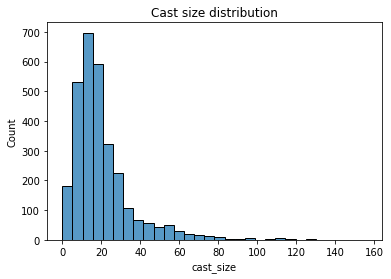

In [82]:
sns.histplot(x='cast_size',data=df_train,bins=30)
plt.title('Cast size distribution')
plt.show()

Text(0.5, 1.0, 'Cast size vs. Revenue')

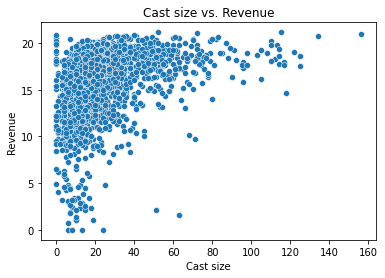

In [83]:

sns.scatterplot(x='cast_size',y='revenue',data=df_train)
plt.xlabel('Cast size')
plt.ylabel('Revenue')
plt.title('Cast size vs. Revenue')


In [84]:
#crew size

df_train['crew_size'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['crew']:
    d = get_dictionary(i)
    if d != {}:
        df_train['crew_size'].iloc[j] = len(d)
    else:
        df_train['crew_size'].iloc[j] = np.NaN
    j += 1
df_train['crew_size']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       72.0
1        9.0
2       64.0
3        3.0
4        2.0
        ... 
2995    17.0
2996    15.0
2997    10.0
2998    89.0
2999    48.0
Name: crew_size, Length: 3000, dtype: float64

In [85]:
df_train['crew_size'].fillna(0,inplace=True)

Text(0.5, 1.0, 'Crew size vs. Revenue')

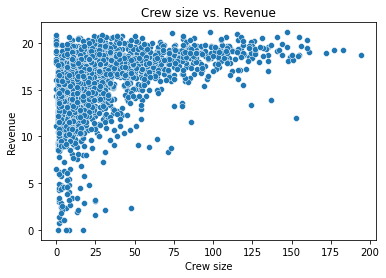

In [86]:

sns.scatterplot(x='crew_size',y='revenue',data=df_train)
plt.xlabel('Crew size')
plt.ylabel('Revenue')
plt.title('Crew size vs. Revenue')


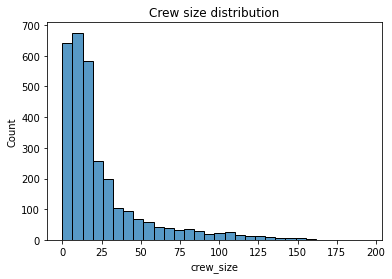

In [87]:
sns.histplot(x='crew_size',data=df_train,bins=30)
plt.title('Crew size distribution')
plt.show()

In [88]:
df_train['crew_genders'] = pd.Series(dtype='object')
j = 0
for i in df_train['crew']:
    d = get_dictionary(i)
    if d != {}:
        df_train['crew_genders'].iloc[j] = [d[x]['gender'] for x in range(0,len(d))]

    else:
         df_train['crew_genders'].iloc[j] = []
    j += 1



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


As of right now we will keep the original cast and crew variables with every director/actor/crewmember's information, though I don't believe they will be of particular use going forward, as this information is very film specific. 

In [89]:

ix = 0
for row in df_train['crew_genders']:
    df_train.loc[ix,'crew_gen_0'] = row.count(0)
    df_train.loc[ix,'crew_gen_1'] = row.count(1)
    df_train.loc[ix,'crew_gen_2'] = row.count(2)
    ix +=1


In [90]:
df_train = df_train.drop(labels='crew_genders',axis=1)

In [91]:
#Track the most frequent crew members
df_train['crew_mem'] = pd.Series(dtype='object')
j = 0
for i in df_train['crew']:
    d = get_dictionary(i)
    if d != {}:
        df_train['crew_mem'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['crew_mem'].iloc[j] = []
    j += 1



In [92]:
top_crew = df_train['crew_mem'].explode().value_counts().head(25)
print(top_crew.index)

for crew in top_crew.index:
    df_train['crew_'+crew] = 0

Index(['Avy Kaufman', 'Robert Rodriguez', 'Deborah Aquila',
       'James Newton Howard', 'Mary Vernieu', 'Steven Spielberg',
       'Jerry Goldsmith', 'Luc Besson', 'Francine Maisler', 'Tricia Wood',
       'James Horner', 'Kerry Barden', 'Harvey Weinstein', 'Janet Hirshenson',
       'Bob Weinstein', 'Jane Jenkins', 'John Debney', 'John Papsidera',
       'Hans Zimmer', 'Francis Ford Coppola', 'Mindy Marin', 'Billy Hopkins',
       'Danny Elfman', 'Sarah Finn', 'Mark Isham'],
      dtype='object')


In [93]:
for i in range(len(df_train)):
    for crew in top_crew.index:
        crew_ix = 'crew_'+crew
        if crew in df_train.loc[i,'crew_mem']:
            df_train.loc[i,crew_ix] = 1

In [94]:
df_train.crew[0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [95]:
df_train.columns[0:20]

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'Keywords', 'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_company_num',
       'prod_country', 'prod_country_num', 'prod_United States of America',
       'prod_United Kingdom', 'prod_France', 'prod_Germany'],
      dtype='object')

Now examine the relationships between the features.

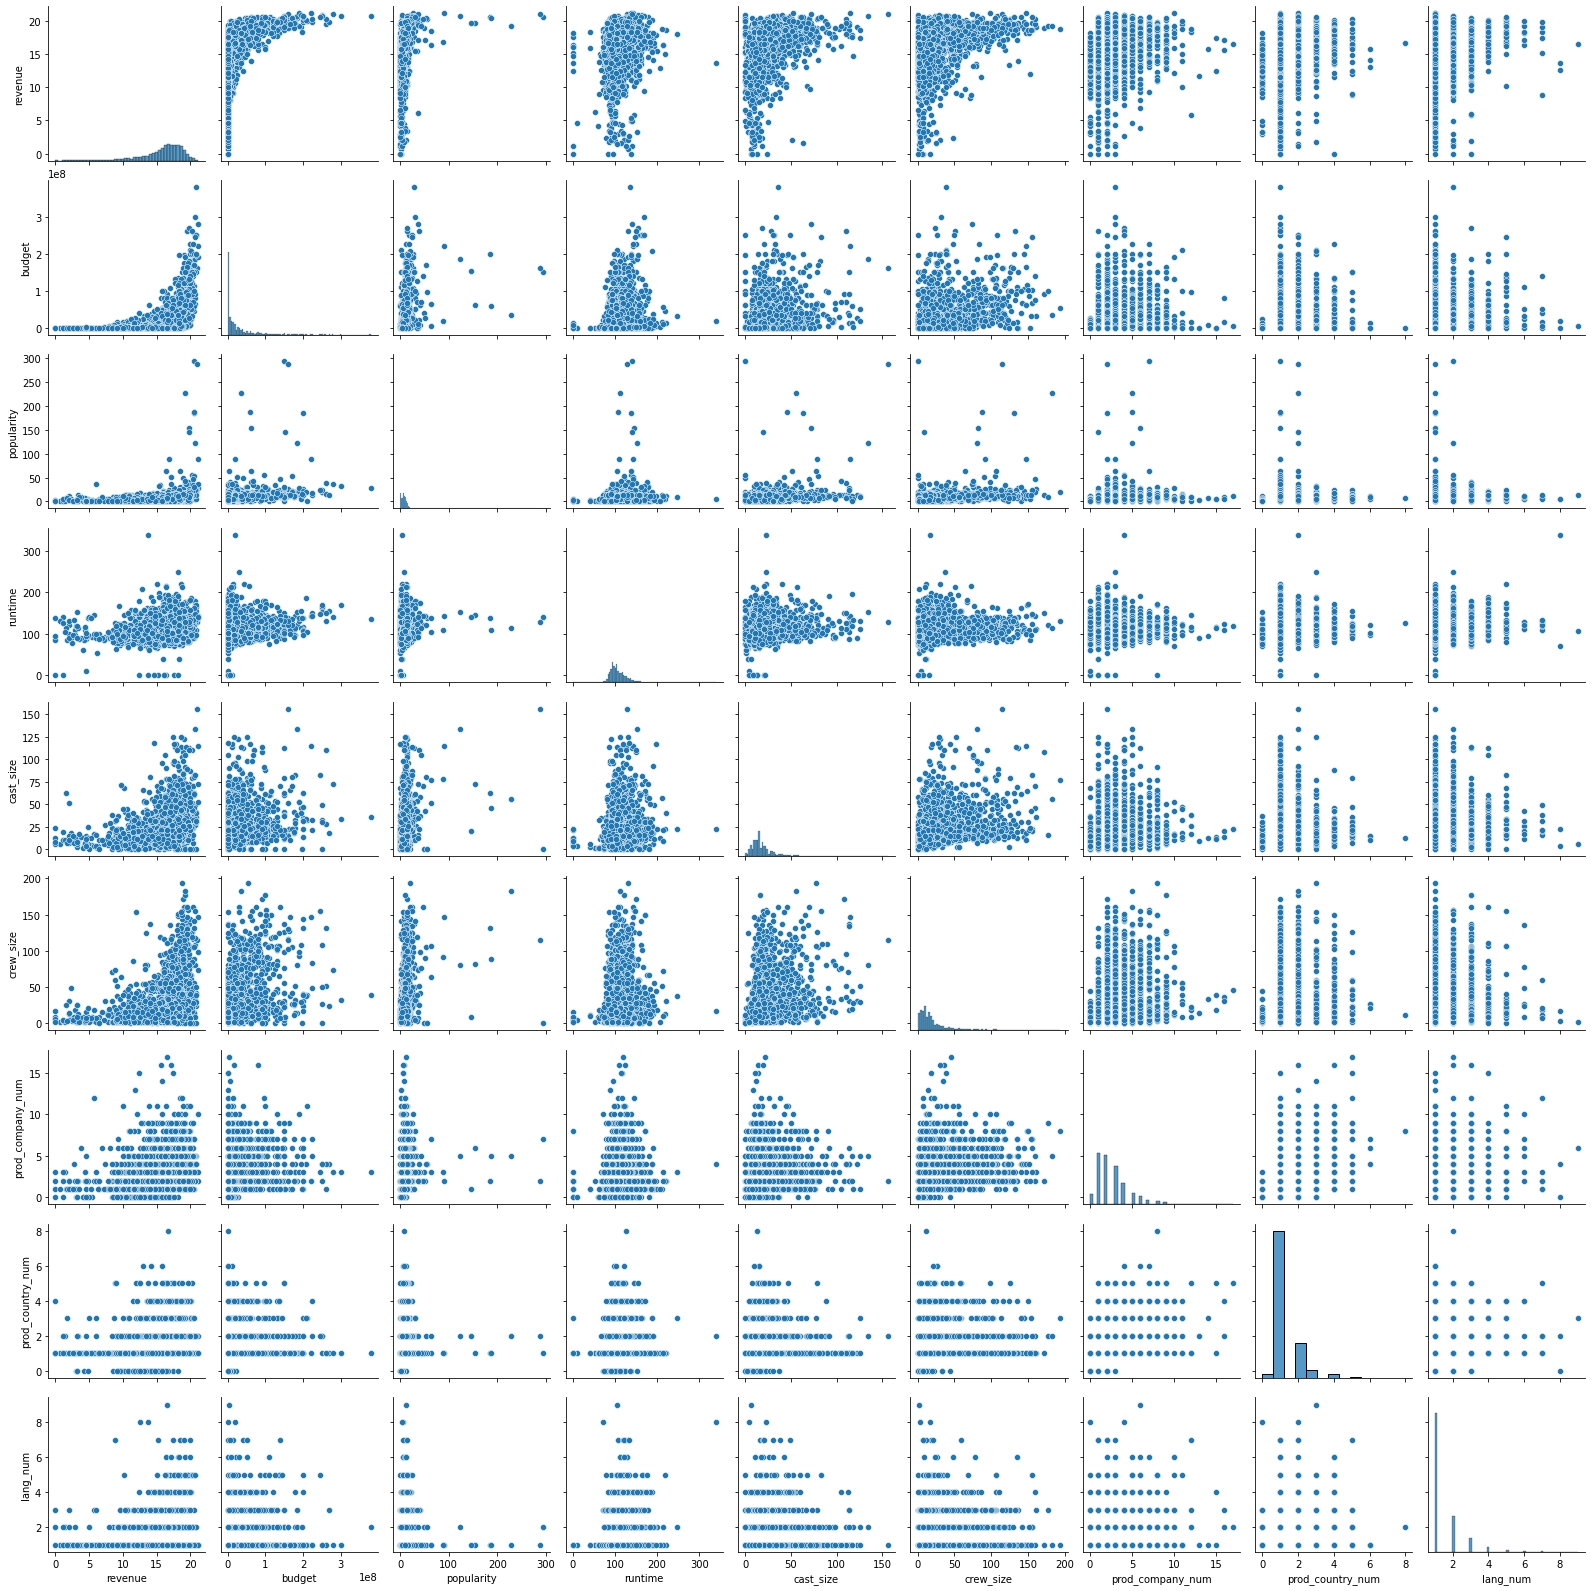

In [96]:
#pair plot
sns.pairplot(df_train[['revenue','budget','popularity','runtime','cast_size','crew_size','prod_company_num','prod_country_num','lang_num']])
plt.show()

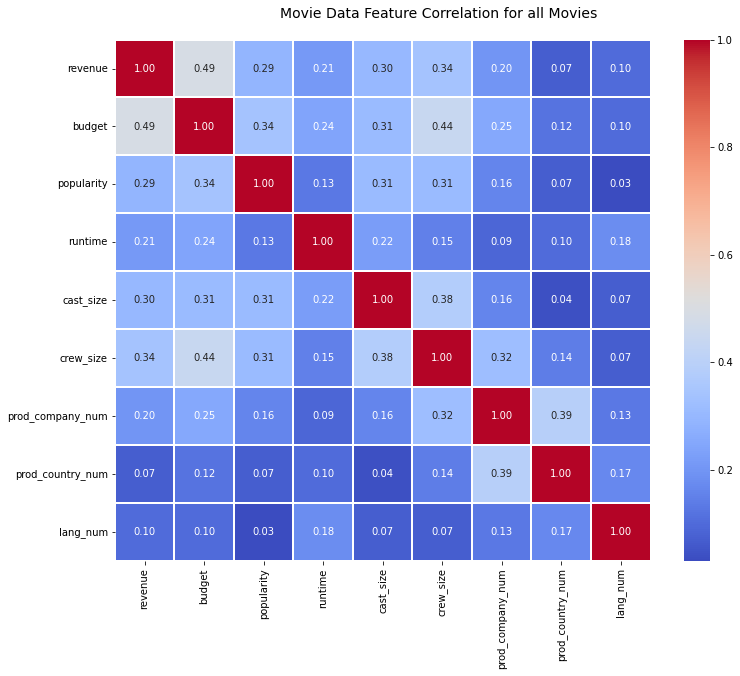

In [97]:

#correlation matrix 
corrmat = df_train[['revenue','budget','popularity','runtime','cast_size','crew_size','prod_company_num','prod_country_num','lang_num']].corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Data Feature Correlation for all Movies', fontsize=14)

There are several promising correlations with revenue among our numeric features, including budget (the strongest correlation), popularity, crew and cast-size, as well as runtime to a lesser extent. In order to further examine the role of remaining categorical values (genre, original language, possibly some features tied to keywords), further EDA is necessary. We did not visualize all of our boolean features because there are too many of them, already, it would only be overwhelming.

In [98]:
print(df_train.shape)
print(df_train.columns)

(3000, 180)
Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'Keywords', 'cast', 'crew', 'revenue',
       ...
       'crew_Jane Jenkins', 'crew_John Debney', 'crew_John Papsidera',
       'crew_Hans Zimmer', 'crew_Francis Ford Coppola', 'crew_Mindy Marin',
       'crew_Billy Hopkins', 'crew_Danny Elfman', 'crew_Sarah Finn',
       'crew_Mark Isham'],
      dtype='object', length=180)


There were originally 3000 rows x 23 columns worth of data. The clean version includes 3000 rows x 26 columns of data.

However, many of the original columns have been dropped. We removed columns that were only useful for id purposes (imdb ids, ids, original titles, titles, descriptions, and internet links), as well as film status, because the 4 unreleased films are beyond the scope of our study. We replaced columns with homepage, tagline and status information with booleans.

We created new features to track the cast size, crew size, number of spoken languages, number of production companies and countries. 

We created dummy variables to check whether films were produced by main production studios, to mark the languages spoken in the film, and the production countries of the film.

We will need to explore keyword and genre name for further analysis. We also added columns to track the genders of cast and crew members for each film as well as whether or not the 25 most popular individuals in each category worked in the film in question. We might do more work with them in later steps, so they will stay in our dataset for now.

At this point, we have several features that could potentially play a role in predicting revenue, including budget, cast and crew size, and popularity, and more. Moving forward, we will continue to examine these features, as well as further examine the role genre plays on revenue.

Furthermore, we took the log functions of our target variable of revenue. Now in order to make 'results' we should remember that we must transform our data again

In [99]:
# save the data to a new csv file
df_train.to_csv('data/interim/movies.csv')